.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

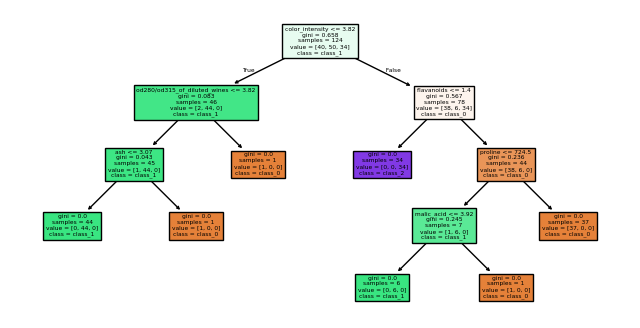

In [1]:
#primo passo, caricare il dataset
from sklearn.datasets import load_wine
#caricare le librerie ed i vari algoritmi
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
#visualizzare le caratteristiche del dataset
wine = load_wine()
print(wine.DESCR)
#caricare i dati e le etichette
X , y = wine.data , wine.target
#dividere il dataset in train e test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3, random_state = 42)
#primo algoritmo, Gaussian Naïve Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train , y_train)
y_pred = nb_classifier.predict(X_test)
print("Accuracy", accuracy_score(y_test , y_pred))
print("Classification Report GaussianNB\n", classification_report(y_test , y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test , y_pred))
#proviamo con K-Neighbors Classifier
scaler = StandardScaler ()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
krange = range(1,26)
kscores = []
for k in krange:
    knn_cv = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_cv, x_train_scaled, y_train, cv=10, scoring='accuracy')
    kscores.append(score.mean())
optimal_k = krange[np.argmax (kscores)] 
print(f"utilizzando il classificatore K-Neighbors, il numero ottimale di neighbors è {optimal_k}") 
knn_classifier = KNeighborsClassifier(n_neighbors = optimal_k) 
knn_classifier.fit(x_train_scaled , y_train) 
y_pred = knn_classifier.predict(x_test_scaled) 
print("Accuracy", accuracy_score(y_test , y_pred))
print("Classification Report KNeighnors\n", classification_report(y_test , y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test , y_pred))
#ultimo algoritmo, deicion tree
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train , y_train)
y_pred = tree_classifier.predict(X_test)
print("Accuracy", accuracy_score(y_test , y_pred))
print("Classification Report Decision Tree Classifier\n", classification_report(y_test , y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test , y_pred))
#infine visualizziamo l'albero delle scelte con plot_tree
plt.figure(figsize=(8,4))
plot_tree(tree_classifier , feature_names=wine.feature_names , class_names=wine.target_names , filled=True)
plt.show()